In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Agrupamento Supervisionado

* Queremos montar grupos que possuem reflexo em uma determinada variavel
* Os clusters devem ser distintos em relação a esta variavel mas, que esta não seja única descritiva
* Desejamos encontrar padrões nas variáveis, com a principal sendo a "resposta" para selecionar as demais
* Com a variável principal escolhida, constrói-se um modelo de supervisionado para selecionar as demais, observando os maiores coeficientes ou alguma métrica de importância de variáveis

* Base de dados referentes a informações de saude de municipios brasileiros

In [2]:
df = pd.read_csv("municipio.csv")

In [3]:
df.head()

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica
0,2007,7,AC,1200013,120001,11786,0.00,0.0,0,0,5,5,11786,100.0,11786,100.0
1,2007,8,AC,1200013,120001,11786,0.33,1.0,0,0,5,5,11786,100.0,11786,100.0
2,2007,9,AC,1200013,120001,11786,0.33,1.0,0,0,5,5,11786,100.0,11786,100.0
3,2007,10,AC,1200013,120001,11786,0.33,1.0,0,0,5,5,11786,100.0,11786,100.0
4,2007,11,AC,1200013,120001,11786,0.33,2.0,0,0,5,5,11786,100.0,11786,100.0


In [4]:
# Selecionando dados de novembro de 2020
df_2020 = df[(df['ano']==2020) & (df['mes']==11)]

In [5]:
df_2020.head()

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica
835114,2020,11,AC,1200013,120001,15256,0.00,0.0,0,0,5,5,15256,100.0,15256,100.0
835126,2020,11,AC,1200054,120005,7417,0.00,0.0,0,0,3,3,7417,100.0,7417,100.0
835138,2020,11,AC,1200104,120010,26278,0.66,3.0,0,0,9,9,26278,100.0,26278,100.0
835150,2020,11,AC,1200138,120013,10266,0.66,0.0,0,0,4,4,10266,100.0,10266,100.0
835162,2020,11,AC,1200179,120017,11733,0.00,2.0,0,0,5,5,11733,100.0,11733,100.0


* A nossa variavel principal sera a carga horaria de atencao medica basica
    * É uma variavel com distribuicao assimetrica, com muitos valores extremos a direita e muitos valores proximos ou iguais a zero

In [6]:
df['carga_horaria_medica_atencao_basica_tradicional'].describe()

count    901944.000000
mean          2.151747
std          16.930776
min           0.000000
25%           0.000000
50%           0.330000
75%           1.210000
max        1376.150000
Name: carga_horaria_medica_atencao_basica_tradicional, dtype: float64

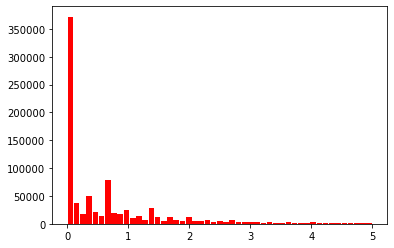

In [7]:
minimo = df['carga_horaria_medica_atencao_basica_tradicional'].min()
plt.hist( df['carga_horaria_medica_atencao_basica_tradicional'], bins = np.linspace(minimo, 5,50), color = 'r', density=False, rwidth=0.9)
plt.show()

* Com a variável principal escolhida, constroi-se uma Random Forest, testando as seguintes features:
    * Populacao
    * Carga horaria de enfermagem de atencao basica
    * Qttd de equipes de atencao basica equivalentes ao programa saude da familia
    * Qttd de equipes de atencao basica total
    * Proporcao da populacao coberta pela atencao basica

In [8]:
df_modelo = df_2020[['populacao','carga_horaria_medica_atencao_basica_tradicional',
                     'carga_horaria_enfermagem_atencao_basica_tradicional','quantidade_equipes_atencao_basica_equivalente',
                    'quantidade_equipes_atencao_basica_total','proporcao_cobertura_total_atencao_basica']]

In [9]:
#Separando entre variavel resposta e explicativas
df_indep = df_modelo.drop(['carga_horaria_medica_atencao_basica_tradicional'],axis=1)
df_dep = df_modelo.carga_horaria_medica_atencao_basica_tradicional

In [10]:
# Verificando nulos
df_indep.isna().sum()

populacao                                              0
carga_horaria_enfermagem_atencao_basica_tradicional    0
quantidade_equipes_atencao_basica_equivalente          0
quantidade_equipes_atencao_basica_total                0
proporcao_cobertura_total_atencao_basica               0
dtype: int64

In [11]:
df_dep.isna().sum()

0

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_indep,df_dep, test_size=.3)

In [13]:
# Criando modelo de random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parametros = {'max_leaf_nodes': [4,8,16,32,64]}
scoring = {'MAE': 'neg_mean_absolute_error','R2': 'r2'}

rf = GridSearchCV(
    RandomForestRegressor(n_estimators=1000,criterion = 'mae', random_state=61658),
    parametros,
    cv=5,
    scoring=scoring,
    refit = 'MAE', verbose=10, n_jobs=-1)
rf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:  2.0min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  2.0min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  2.2min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:  3.9min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  4.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  4.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  4.4min remaining:   22.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mae', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=1000, n_jobs=None,
                                             oob_score=False,
                                             random_state=61658, verbose=0,
                                             warm_st

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(mean_absolute_error(y_test, rf.predict(X_test))) # o erro absoluto médio é de 0,52 na base de teste
print(r2_score(y_test, rf.predict(X_test))) # O R2 no teste foi de 0,89

0.5284420556552942
0.8947698941037602


* Verificando a importancia de variaveis
    * A variavel de quantidade de equipes de atencao basica foi a mais importante, muito distante das proximas
    * Carga horaria de enfermagem foi a segunda somando, com a primeira, 91% da importancia de variaveis

In [15]:
imps = rf.best_estimator_.feature_importances_
cols = X_train.columns
order= np.argsort(imps)[::-1]

for col,imp in zip(cols[order],imps[order]):
    print(f'{col:50s} {imp:.4f}')

quantidade_equipes_atencao_basica_equivalente      0.8669
carga_horaria_enfermagem_atencao_basica_tradicional 0.0561
populacao                                          0.0355
quantidade_equipes_atencao_basica_total            0.0344
proporcao_cobertura_total_atencao_basica           0.0071


* Para gerar os clusters escolhe-se, alem da variavel principal, as 3 primeiras em importancia do modelo de random forest

In [16]:
df_cluster = df_2020[['carga_horaria_medica_atencao_basica_tradicional','quantidade_equipes_atencao_basica_equivalente',
                'carga_horaria_enfermagem_atencao_basica_tradicional','populacao']]

* Para a construção dos clusters, as variáveis serão discretizadas, para tanto, constroi-se a seguir modelos de Kmeans para cada variável, observando qual sera a melhor quantidade de grupos a ser gerada
    * Para todas as variáveis há uma queda substancial da variância de cada grupo quando gerado 4/5 clusters
    * Desta forma, para padronizar, cada variavel sera quebrada em 5 grupos

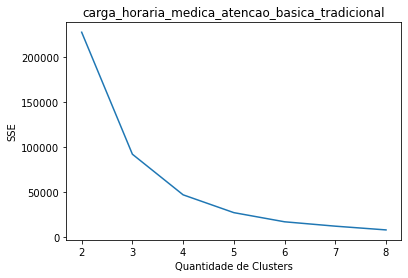

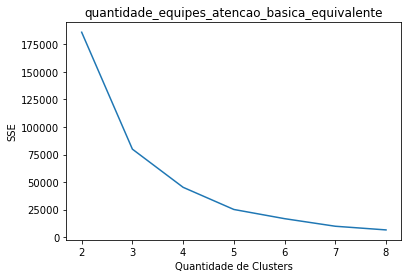

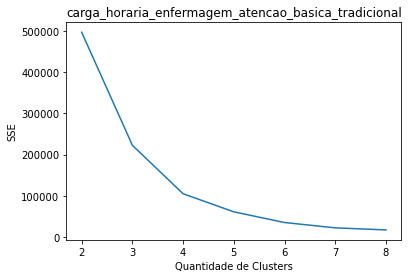

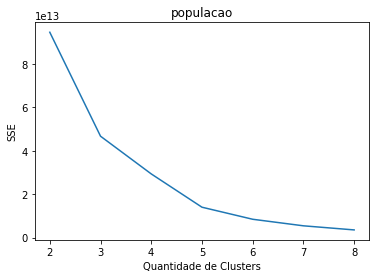

In [17]:
from sklearn.cluster import KMeans
for x in df_cluster.columns.to_list():
    df_var = df_cluster[[x]]
    sse = []
    for y in range(2, 8+1):
        kmeans = KMeans(init = 'k-means++',n_init = 50,max_iter = 300,n_clusters=y,random_state=50, n_jobs=-1)
        kmeans.fit(df_var)
        sse.append(kmeans.inertia_)
    plt.plot(range(2, 8+1), sse)
    plt.xticks(range(2, 8+1))
    plt.xlabel("Quantidade de Clusters")
    plt.ylabel("SSE")
    plt.title(f'{x}')
    plt.show()

In [18]:
# Separando cada variavel em 5 clusters, marcando o comeco e final de cada grupo
from sklearn.preprocessing import KBinsDiscretizer
scaler = KBinsDiscretizer(n_bins=5,encode='onehot-dense',strategy='kmeans')
for a in df_cluster.columns.to_list():
    scaler.fit(df_cluster[[a]])
    novas_colunas = []
    for comeco, fim in zip(scaler.bin_edges_[0][:-1],scaler.bin_edges_[0][1:6]):
        novas_colunas.append(f'{a}' + "_" + str(f'{comeco:.3f}')+ "_" + str(f'{fim:.3f}'))
    df_cluster = df_cluster.join( pd.DataFrame(scaler.transform(df_cluster[[a]]),columns=novas_colunas,index=df_cluster.index) ) 
    df_cluster = df_cluster.drop(a,axis=1)

In [19]:
df_cluster.head()

,carga_horaria_medica_atencao_basica_tradicional_0.000_10.451,carga_horaria_medica_atencao_basica_tradicional_10.451_47.824,carga_horaria_medica_atencao_basica_tradicional_47.824_629.047,carga_horaria_medica_atencao_basica_tradicional_629.047_1182.360,quantidade_equipes_atencao_basica_equivalente_0.000_9.813,quantidade_equipes_atencao_basica_equivalente_9.813_50.307,quantidade_equipes_atencao_basica_equivalente_50.307_631.833,quantidade_equipes_atencao_basica_equivalente_631.833_1182.000,carga_horaria_enfermagem_atencao_basica_tradicional_0.000_22.153,carga_horaria_enfermagem_atencao_basica_tradicional_22.153_134.339,carga_horaria_enfermagem_atencao_basica_tradicional_134.339_821.254,carga_horaria_enfermagem_atencao_basica_tradicional_821.254_1415.900,populacao_781.000_226279.170,populacao_226279.170_1247510.463,populacao_1247510.463_4391380.273,populacao_4391380.273_9485463.000,populacao_9485463.000_12252023.000
835114,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
835126,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
835138,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
835150,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
835162,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


* Como todas as variaveis estao discretizadas, é viavel usar a distancia cosseno para construir os clusters
    * Medida de similaridade aplicável em casos de atributos discretos (em colunas de 0 e 1)

In [20]:
# Ajuste matematico para aplicar a distancia de cosseno
df_cluster2 = df_cluster.div( ((df_cluster**2).sum(axis=1)**.5), axis=0)

In [21]:
df_cluster2.head()

,carga_horaria_medica_atencao_basica_tradicional_0.000_10.451,carga_horaria_medica_atencao_basica_tradicional_10.451_47.824,carga_horaria_medica_atencao_basica_tradicional_47.824_629.047,carga_horaria_medica_atencao_basica_tradicional_629.047_1182.360,quantidade_equipes_atencao_basica_equivalente_0.000_9.813,quantidade_equipes_atencao_basica_equivalente_9.813_50.307,quantidade_equipes_atencao_basica_equivalente_50.307_631.833,quantidade_equipes_atencao_basica_equivalente_631.833_1182.000,carga_horaria_enfermagem_atencao_basica_tradicional_0.000_22.153,carga_horaria_enfermagem_atencao_basica_tradicional_22.153_134.339,carga_horaria_enfermagem_atencao_basica_tradicional_134.339_821.254,carga_horaria_enfermagem_atencao_basica_tradicional_821.254_1415.900,populacao_781.000_226279.170,populacao_226279.170_1247510.463,populacao_1247510.463_4391380.273,populacao_4391380.273_9485463.000,populacao_9485463.000_12252023.000
835114,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
835126,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
835138,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
835150,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
835162,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0


* Verificando a variabilidade conforme o numero de clusters

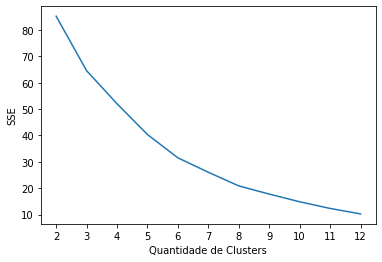

In [22]:
sse = []
for y in range(2, 12+1):
    kmeans = KMeans(init = 'k-means++',n_init = 1000,max_iter = 3000,n_clusters=y,random_state=50, n_jobs=-1)
    kmeans.fit(df_cluster2)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 12+1), sse)
plt.xticks(range(2, 12+1))
plt.xlabel("Quantidade de Clusters")
plt.ylabel("SSE")
plt.show()

* Calculando o silhouette score para cada quantidade de clusters
    * O score esta bem proximo de 1, que seria o melhor valor possivel

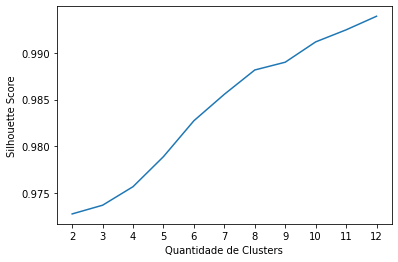

In [23]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for x in range(2, 12+1):
    kmeans = KMeans(init = 'k-means++',n_init = 1000,max_iter = 3000,n_clusters=x,random_state=50)
    kmeans.fit(df_cluster2)
    score = silhouette_score(df_cluster2, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(range(2, 12+1), silhouette_scores)
plt.xticks(range(2, 12+1))
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Silhouette Score")
plt.show()

* Não há uma mudança brusca nas métricas entre os clusters, assim, decide-se por 5 clusters em virtude de ja apresentar uma metrica satisfatória

In [24]:
kmeans = KMeans(init = 'k-means++',n_init = 1000,max_iter = 3000,n_clusters=5, random_state=50)
df_cluster_ = df_2020[['carga_horaria_medica_atencao_basica_tradicional','quantidade_equipes_atencao_basica_equivalente',
                'carga_horaria_enfermagem_atencao_basica_tradicional','populacao']]
df_cluster_.loc[:,'cluster'] = kmeans.fit_predict(df_cluster2)

* Foram gerados 05 clusters, sendo que 01 contem a maioria das observacoes e os demais com poucos municipios

In [25]:
df_cluster_['cluster'].value_counts()

0    5394
1      70
4      57
2      32
3      17
Name: cluster, dtype: int64

* Entendendo os clusters:
    * Cluster 0: Cidades pequenas com pouco volume de cobertura de saúde
    * Cluster 1: Cidades médias com bom volume de cobertura de saúde
    * Cluster 2: Cidades médias com pouco volume de cobertura de saúde
    * Cluster 3: Cidades grandes com alto volume de cobertura de saúde
    * Cluster 4: Cidades médias com volume intermediário de cobertura de saúde

In [26]:
def quant_10(x):
    return x.quantile(0.10)

def quant_90(x):
    return x.quantile(0.90)
df_cluster_.groupby('cluster').agg([quant_10, 'median', quant_90])

carga_horaria_medica_atencao_basica_tradicional                   \
                                               quant_10  median quant_90   
cluster                                                                    
0                                                 0.000   0.660    2.530   
1                                                12.475  21.655   38.760   
2                                                 3.415   6.865   28.968   
3                                                53.990  70.010  153.908   
4                                                11.622  15.660   29.610   

        quantidade_equipes_atencao_basica_equivalente                  \
                                             quant_10 median quant_90   
cluster                                                                 
0                                                 0.0      0      2.0   
1                                                12.9     22     38.0   
2                                                 2.1      6      8.9   
3                                                51.0     70    154.0   
4                                                11.0     13     18.0   

        carga_horaria_enfermagem_atencao_basica_tradicional                    \
                                                   quant_10   median quant_90   
cluster                                                                         
0                                                    0.000     1.000    5.000   
1                                                   23.395    35.875   53.320   
2                                                    3.100     7.810   15.080   
3                                                   54.198   104.200  299.648   
4                                                   10.960    14.750   20.020   

        populacao                        
         quant_10     median   quant_90  
cluster                                  
0          3150.0    11206.5    46485.8  
1        160768.7   344510.5   887669.4  
2        237989.2   289750.5   468009.2  
3        505859.6  1516113.0  4496722.0  
4         95228.6   232491.0   546692.4